In [1]:
import pandas as pd
import numpy as np
import gzip
import os
import json

In [1]:
with open('metadata.json') as file:
    metadata=json.load(file)

FileNotFoundError: [Errno 2] No such file or directory: 'metadata.json'

In [4]:
file_id_to_tcga_id_dict = {}
file_id_to_file_name_dict = {}
file_id_list = []
file_name_list = []
tcga_id_list = []
for i in metadata:
    file_id_to_tcga_id_dict[i["file_id"]] = i["associated_entities"][0]["entity_submitter_id"]
    file_id_to_file_name_dict[i["file_id"]] = i["file_name"]
    file_id_list.append(i["file_id"])
    file_name_list.append(i["file_name"])
    tcga_id_list.append(i["associated_entities"][0]["entity_submitter_id"])

NameError: name 'metadata' is not defined

In [ ]:
a_file = gzip.open("TCGA_LUAD_GDC/001c6345-176c-4ab3-a0c8-27384879a8ff/8f4891e2-55c1-48f4-bdce-c3848f74b8dc.htseq.counts.gz", "rb")
contents = a_file.read()

In [ ]:
from io import StringIO
s=str(contents,'utf-8')
data = StringIO(s)
df=pd.read_csv(data,sep="\t")

In [ ]:
df = (((((df.transpose()).reset_index()).transpose()).set_index(0)).rename(columns={1: "id"}))
df = df.drop(["id"], axis = 1)

In [ ]:
c=1
for j,k,l in zip(file_id_list, file_name_list, tcga_id_list):
    path = "TCGA_LUAD_GDC/" + j + "/" + k
    if os.path.exists(path):
        a_file = gzip.open(path, "rb")
        contents = a_file.read()
        s=str(contents,'utf-8')
        data = StringIO(s)
        new_df = pd.read_csv(data,sep="\t")
        new_df = ((((new_df.transpose()).reset_index()).transpose()).set_index(0)).rename(columns={1: l})
        column = list(new_df[l])
        df[l] = column
        print(c)
        c+=1

In [ ]:
df.to_csv("FORMATTED_TCGA_EXPRESSION_MATRIX.CSV")

In [ ]:
df_t = df.transpose()

In [ ]:
df_t = df_t.drop(["__no_feature", "__ambiguous", "__too_low_aQual","__not_aligned","__alignment_not_unique"], axis = 1)

In [ ]:
df_t = ((df_t.transpose()).drop(["clusters"], axis = 1)).transpose()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
df_t

In [ ]:
features = list(df_t.columns)

clustering_kmeans = KMeans(n_clusters=10, precompute_distances="auto", n_jobs=-1)
df_t['clusters'] = clustering_kmeans.fit_predict(df_t)

In [ ]:
reduced_data = PCA(n_components=10).fit_transform(df_t)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7',
                                            'pca8','pca9','pca10',])


In [ ]:
results["clusters"] = clustering_kmeans.fit_predict(df_t)

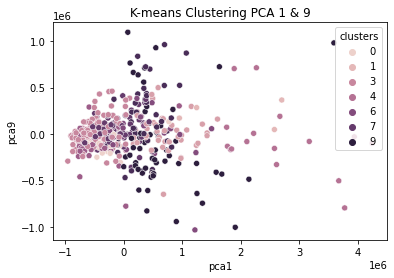

In [65]:

sns.scatterplot(x=results["pca1"], y=results["pca9"], hue=results['clusters'])
plt.title('K-means Clustering PCA 1 & 9')
plt.show()

In [24]:
#extract important features
#run random forests and logistic regressions

,TCGA-44-7660-01A-11R-2066-07,TCGA-78-8662-01A-11R-2403-07,TCGA-75-7027-01A-11R-1949-07,TCGA-97-A4M6-01A-11R-A24X-07,TCGA-MP-A4SV-01A-11R-A24X-07,TCGA-55-6985-11A-01R-1949-07,TCGA-38-4627-01A-01R-1206-07,TCGA-93-A4JO-01A-21R-A24X-07,TCGA-44-2668-11A-01R-1758-07,TCGA-05-4426-01A-01R-1206-07,...,TCGA-78-7153-01A-11R-2039-07,TCGA-55-7910-01A-11R-2170-07,TCGA-55-6981-11A-01R-1949-07,TCGA-64-5778-01A-01R-1628-07,TCGA-55-7815-01A-11R-2170-07,TCGA-55-6985-01A-11R-1949-07,TCGA-69-7761-01A-11R-2170-07,TCGA-MN-A4N4-01A-12R-A24X-07,TCGA-55-6972-01A-11R-1949-07,clusters
0,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.13,6649,2358,6770,7405,2415,2805,10707,3552,988,9505,...,5555,928,841,5451,2531,3959,1261,3381,1579,0
ENSG00000000005.5,0,2,0,4,48,0,3,0,2,1,...,3,0,0,0,0,0,2,0,0,0
ENSG00000000419.11,2342,608,2750,1319,1774,1671,2014,1991,1287,2432,...,1021,1794,573,2402,778,990,1563,2254,1840,0
ENSG00000000457.12,1242,573,1362,1706,1295,1098,724,1049,483,1261,...,682,493,338,925,546,485,1492,975,1103,0
ENSG00000000460.15,705,349,1420,407,767,230,377,526,156,459,...,253,344,105,624,210,238,533,586,210,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
__no_feature,7179541,1870215,6408040,4069323,5822208,5602645,1608675,6100627,2465238,4202129,...,2409987,4290307,2681924,2092005,1496320,2199570,4271034,4450952,1623035,0
__ambiguous,2591897,1554045,3301100,2028754,2119547,2345924,3052342,2084159,2641505,3743902,...,1915522,1205393,987110,2258471,864733,1323583,2157246,2115962,1024623,0
__too_low_aQual,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [23]:
import pandas as pd
data = pd.read_excel(r'C:/Users/drobi/OneDrive/Documents/Lung Cancer Biomarkers Clustering Excel File Revision Two.xlsx')
print(data)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/drobi/OneDrive/Documents/Lung Cancer Biomarkers Clustering Excel File Revision Two.xlsx'

In [20]:
import pandas as pd

candidates = {'Sample Feature': [1,2,3,4,5], 'TCGA-44-7660-01A-11R-2066-07': [6649,0,2342,1242,705], 'TCGA-78-8662-01A-11R-2403-07': [2358,2,608,573,349], 'TCGA-75-7027-01A-11R-1949-07': [6770,0,2750,1362,1420], 'TCGA-97-A4M6-01A-11R-A24X-07': [7405,4,1319,1706,407], 'TCGA-MP-A4SV-01A-11R-A24X-07': [2415,48,1774,1295,767], 'TCGA-55-6985-11A-01R-1949-07': [2805,0,1671,1098,230], 'TCGA-38-4627-01A-01R-1206-07': [10707,3,2014,724,377], 'TCGA-93-A4JO-01A-21R-A24X-07': [3552,0,1991,1049,526], 'TCGA-44-2668-11A-01R-1758-07': [988,2,1287,483,156], 'TCGA-78-7220-01A-11R-2039-07': [2923,0,2740,1079,866], 'TCGA-78-7153-01A-11R-2039-07': [555,3,1021,682,253], 'TCGA-55-7910-01A-11R-2170-07': [928,0,1794,493,344], 'TCGA-55-6981-11A-01R-1949-07': [841,0,573,338,105], 'TCGA-64-5778-01A-1628-07': [5451,0,2402,925,624], 'TCGA-55-7815-01A-11R-2170-07': [2531,0,778,546,210], 'TCGA-55-6985-01A-11R-1949-07': [3959,0,990,485,238], 'TCGA-69-7761-01A-11R-2170-07': [1261,2,1563,1492,533], 'TCGA-MN-A4N4-01A-12R-A24X-07': [3381,0,2254,975,586], 'TCGA-55-6972-01A-11R-1949-07': [1579,0,1840,1103,210]} 
df = pd.DataFrame(candidates,columns = ['Sample Feature','TCGA-44-7660-01A-11R-2066-07','TCGA-78-8662-01A-11R-2403-07','TCGA-75-7027-01A-11R-1949-07','TCGA-97-A4M6-01A-11R-A24X-07','TCGA-MP-A4SV-01A-11R-A24X-07','TCGA-55-6985-11A-01R-1949-07','TCGA-38-4627-01A-01R-1206-07','TCGA-93-A4JO-01A-21R-A24X-07','TCGA-44-2668-11A-01R-1758-07','TCGA-05-4426-01A-01R-1206-07','TCGA-78-7220-01A-11R-2039-07','TCGA-78-7153-01A-11R-2039-07','TCGA-55-7910-01A-11R-2170-07','TCGA-55-6981-11A-01R-1949-07','TCGA-64-5778-01A-01R-1628-07','TCGA-55-7815-01A-11R-2170-07','TCGA-55-6985-01A-11R-1949-07','TCGA-69-7761-01A-11R-2170-07','TCGA-MN-A4N4-01A-12R-A24X-07','TCGA-55-6972-01A-11R-1949-07'])
print(df)

ValueError: arrays must all be same length

In [16]:
#Step 3: Applying the Random Forest in Python
X = df[['TCGA-44-7660-01A-11R-2066-07','TCGA-78-8662-01A-11R-2403-07','TCGA-75-7027-01A-11R-1949-07','TCGA-97-A4M6-01A-11R-A24X-07','TCGA-MP-A4SV-01A-11R-A24X-07','TCGA-55-6985-11A-01R-1949-07','TCGA-38-4627-01A-01R-1206-07','TCGA-93-A4JO-01A-21R-A24X-07','TCGA-44-2668-11A-01R-1758-07','TCGA-05-4426-01A-01R-1206-07','TCGA-78-7220-01A-11R-2039-07','TCGA-78-7153-01A-11R-2039-07','TCGA-55-7910-01A-11R-2170-07','TCGA-55-6981-11A-01R-1949-07','TCGA-64-5778-01A-01R-1628-07','TCGA-55-7815-01A-11R-2170-07','TCGA-55-6985-01A-11R-1949-07','TCGA-69-7761-01A-11R-2170-07','TCGA-MN-A4N4-01A-12R-A24X-07','TCGA-55-6972-01A-11R-1949-07']]
y = df['Sample Feature']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train,X_test,y_train,y_test


(   TCGA-44-7660-01A-11R-2066-07  TCGA-78-8662-01A-11R-2403-07  \
 1                             0                             2   
 7                      22978441                      13899988   
 3                          1242                           573   
 0                          6649                          2358   
 5                       7179541                       1870215   
 4                           705                           349   
 
    TCGA-75-7027-01A-11R-1949-07  TCGA-97-A4M6-01A-11R-A24X-07  \
 1                             0                             4   
 7                      32281536                      16339825   
 3                          1362                          1706   
 0                          6770                          7405   
 5                       6408040                       4069323   
 4                          1420                           407   
 
    TCGA-MP-A4SV-01A-11R-A24X-07  TCGA-55-6985-11A-01R-1949-07  \
 1    

In [18]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()



ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [10]:
#Step 4: Performing a Prediction. 
#We Will Need to Create a Random Number Generator in Python From the Range of Our Data Numbers for Our Sample Feature Column. There are 10 Entries.
#Example Code to Use (URL: educba.com/random-number-generator-in-Python)
import random
randomnumberexample = random.randrange(10,20,2)

#Random Number Generator for TCGA-44-7660-01A-11R-2066-07
randomnumberTCGA44766001A11R206607= random.randrange(0,22978441,2)
print(randomnumberTCGA44766001A11R206607)

#Random Number Generator for TCGA-78-8662-01A-11R-2403-07
randomnumberTCGA78866201A11R240307 = random.randrange(0,1399988,2)
print(randomnumberTCGA78866201A11R240307)

#Random Number Generator for TCGA-75-7027-01A-11R-1949-07
randomnumberTCGA75702701A11R194907 = random.randrange(0,32281536,2)
print(randomnumberTCGA75702701A11R194907)

#Random Number Generator for TCGA-97-A4M6-01A-11R-A24X-07
randomnumberTCGA97A4M601A11RA24X07 = random.randrange(0,16339825,2)
print(randomnumberTCGA97A4M601A11RA24X07)

#Random Number Generator for TCGA-MP-A4SV-01A-11R-A24X-07
randomnumberTCGAMPA4SV01A11RA24X07 = random.randrange(0,21727638,2)
print(randomnumberTCGAMPA4SV01A11RA24X07)

#Random Number Generator for TCGA-55-6985-11A-01R-1949-07 
randomnumberTCGA55698511A01R194907 = random.randrange(0,18094219,2)
print(randomnumberTCGA55698511A01R194907)

#Random Number Generator for TCGA-38-4627-01A-01R-1206-07
randomnumberTCGA38462701A01R120607 = random.randrange(0,20896367,2)
print(randomnumberTCGA38462701A01R120607)

#Random Number Generator for TCGA-93-A4JO-01A-21R-A24X-07
randomnumberTCGA93A4JO01A21RA24X07 = random.randrange(0,16700133,2)
print(randomnumberTCGA93A4JO01A21RA24X07)

#Random Number Generator for TCGA-44-2668-11A-01R-1758-07
randomnumberTCGA44266811A01R175807 = random.randrange(0,17995211,2)
print(randomnumberTCGA44266811A01R175807)

#Random Number Generator for TCGA-05-4426-01A-01R-1206-07
randomnumberTCGA05442601A01R120607 = random.randrange(0,36745935,2)
print(randomnumberTCGA05442601A01R120607)

#Random Number Generator for TCGA-78-7220-01A-11R-2039-07
randomnumberTCGA78722001A11R203907 = random.randrange(0,13514086,2)
print(randomnumberTCGA78722001A11R203907)

#Random Number Generator for TCGA-7153-01A-11R-2039-07
randomnumberTCGA715301A11R203907 = random.randrange(0,21200734,2)
print(randomnumberTCGA715301A11R203907)

#Random Number Generator for TCGA-55-7910-01A-11R-2170-07 
randomnumberTCGA55791001A11R217007 = random.randrange(0,14815993,2)
print(randomnumberTCGA55791001A11R217007)

#Random Number Generator for TCGA-55-6981-11A-01R-1949-07 
randomnumberTCGA55698111A01R194907 = random.randrange(0,6340419,2)
print(randomnumberTCGA55698111A01R194907)

#Random Number Generator for TCGA-64-5778-01A-01R-1628-07
randomnumberTCGA64577801A01R162807 = random.randrange(0,19483281,2)
print(randomnumberTCGA64577801A01R162807)

#Random Number Generator for TCGA-55-7815-01A-11R-2170-07
randomnumberTCGA55781501A11R217007 = random.randrange(0,7755456,2)
print(randomnumberTCGA55781501A11R217007)

#Random Number Generator for TCGA-55-6985-01A-11R-1949-07
randomnumberTCGA55698501A11R194907 = random.randrange(0,11029456,2)
print(randomnumberTCGA55698501A11R194907)

#Random Number Generator for TCGA-69-7761-01A-11R-2170-07
randomnumberTCGA69776101A11R217007 = random.randrange(0,22536687,2)
print(randomnumberTCGA69776101A11R217007)

#Random Number Generator for TCGA-MN-A4N4-01A-12R-A24X-07
randomnumberTCGAMNA4N401A12RA24X07 = random.randrange(0,18071669,2)
print(randomnumberTCGAMNA4N401A12RA24X07)

#Random Number Generator for TCGA-55-6972-01A-11R-1949-07
randomnumberTCGA55697201A11R194907 = random.randrange(0,10043513,2)
print(randomnumberTCGA55697201A11R194907)


9178304
342308
17587942
1192732
2421924
17009474
2862476
1374202
11987750
20276902
7610250
19600494
8946990
2990274
11531498
1971216
10653478
9575364
15895920
3451244


In [11]:

PredictionNumberTCGA44766001A11R206607 = print(randomnumberTCGA44766001A11R206607)
PredictionNumberTCGA78866201A11R240307 = print(randomnumberTCGA78866201A11R240307)
PredictionNumberTCGA75702701A11R194907 = print(randomnumberTCGA75702701A11R194907)
PredictionNumberTCGA97A4M601A11RA24X07 = print(randomnumberTCGA97A4M601A11RA24X07)
PredictionNumberTCGAMPA4SV01A11RA24X07 = print(randomnumberTCGAMPA4SV01A11RA24X07)
PredictionNumberTCGA55698511A01R194907 = print(randomnumberTCGA55698511A01R194907)
PredictionNumberTCGA38462701A01R120607 = print(randomnumberTCGA38462701A01R120607)
PredictionNumberTCGA93A4JO01A21RA24X07 = print(randomnumberTCGA93A4JO01A21RA24X07)
PredictionNumberTCGA44266811A01R175807 = print(randomnumberTCGA44266811A01R175807)
PredictionNumberTCGA05442601A01R120607 = print(randomnumberTCGA05442601A01R120607)
PredictionNumberTCGA78722001A11R203907 = print(randomnumberTCGA78722001A11R203907)
PredictionNumberTCGA715301A11R203907 = print(randomnumberTCGA715301A11R203907)
PredictionNumberTCGA55791001A11R217007 = print(randomnumberTCGA55791001A11R217007)
PredictionNumberTCGA55698111A01R194907 = print(randomnumberTCGA55698111A01R194907)
PredictionNumberTCGA64577801A01R162807 = print(randomnumberTCGA64577801A01R162807)
PredictionNumberTCGA55781501A11R217007 = print(randomnumberTCGA55781501A11R217007)
PredictionNumberTCGA55698501A11R194907 = print(randomnumberTCGA55698501A11R194907)
PredictionNumberTCGA69776101A11R217007 = print(randomnumberTCGA69776101A11R217007)
PredictionNumberTCGAMNA4N401A12RA24X07 = print(randomnumberTCGAMNA4N401A12RA24X07)
PredictionNumberTCGA55697201A11R194907 = print(randomnumberTCGA55697201A11R194907)

9178304
342308
17587942
1192732
2421924
17009474
2862476
1374202
11987750
20276902
7610250
19600494
8946990
2990274
11531498
1971216
10653478
9575364
15895920
3451244


In [12]:
#This is where you will be find your prediction answer which will be one of the Sample Features aka the Biomarkers.
prediction = clf.predict([[10974732,1399082,12908794,1467156,15889302,10360202,3149388,7694080,11839820,31072922,5429234,12522026,930604,5512,2104486,1105678,465520,2178368,4412290,8823576]])
print ('Predicted Result: ', prediction)

Predicted Result:  [7]


In [38]:
#You Can Further Attach An Interpolation & Extrapolation Model 


#Step 5 - Creating the Graphical User Interface (GUI) Using the Tkinter Package
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import tkinter as tk

data = pd.read_excel(r'C:/Users/drobi/OneDrive/Documents/Lung Cancer Biomarkers Clustering Excel File Revision One.xlsx')

candidates = data


df = pd.DataFrame(candidates,columns = ['Sample Feature','TCGA-44-7660-01A-11R-2066-07','TCGA-78-8662-01A-11R-2403-07','TCGA-75-7027-01A-11R-1949-07','TCGA-97-A4M6-01A-11R-A24X-07','TCGA-MP-A4SV-01A-11R-A24X-07','TCGA-55-6985-11A-01R-1949-07','TCGA-38-4627-01A-01R-1206-07','TCGA-93-A4JO-01A-21R-A24X-07','TCGA-44-2668-11A-01R-1758-07','TCGA-05-4426-01A-01R-1206-07','TCGA-78-7220-01A-11R-2039-07','TCGA-78-7153-01A-11R-2039-07','TCGA-55-7910-01A-11R-2170-07','TCGA-55-6981-11A-01R-1949-07','TCGA-64-5778-01A-01R-1628-07','TCGA-55-7815-01A-11R-2170-07','TCGA-55-6985-01A-11R-1949-07','TCGA-69-7761-01A-11R-2170-07','TCGA-MN-A4N4-01A-12R-A24X-07','TCGA-55-6972-01A-11R-1949-07'])



X = df[['TCGA-44-7660-01A-11R-2066-07','TCGA-78-8662-01A-11R-2403-07','TCGA-75-7027-01A-11R-1949-07','TCGA-97-A4M6-01A-11R-A24X-07','TCGA-MP-A4SV-01A-11R-A24X-07','TCGA-55-6985-11A-01R-1949-07','TCGA-38-4627-01A-01R-1206-07','TCGA-93-A4JO-01A-21R-A24X-07','TCGA-44-2668-11A-01R-1758-07','TCGA-05-4426-01A-01R-1206-07','TCGA-78-7220-01A-11R-2039-07','TCGA-78-7153-01A-11R-2039-07','TCGA-55-7910-01A-11R-2170-07','TCGA-55-6981-11A-01R-1949-07','TCGA-64-5778-01A-01R-1628-07','TCGA-55-7815-01A-11R-2170-07','TCGA-55-6985-01A-11R-1949-07','TCGA-69-7761-01A-11R-2170-07','TCGA-MN-A4N4-01A-12R-A24X-07','TCGA-55-6972-01A-11R-1949-07']]
y = df['Sample Feature']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


#tkinter GUI
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 5000, height = 2000)
canvas1.pack()

#TCGA-44-7660-01A-11R-2066-07
label1 = tk.Label(root, text='TCGA-44-7660-01A-11R-2066-07:')
canvas1.create_window(160, 160, window=label1)

entry1 = tk.Entry(root)
canvas1.create_window(270, 160, window=entry1)

#TCGA-78-8662-01A-11R-2403-07
label2 = tk.Label(root, text='TCGA-78-8662-01A-11R-2403-07:')
canvas1.create_window(160, 160, window=label2)

entry2 = tk.Entry(root)
canvas1.create_window(270, 160, window=entry2)


#TCGA-75-7027-01A-11R-1949-07
label3 = tk.Label(root, text='TCGA-75-7027-01A-11R-1949-07:')
canvas1.create_window(160, 160, window=label3)

entry3 = tk.Entry(root)
canvas1.create_window(270, 160, window=entry3)

#TCGA-97-A4M6-01A-11R-A24X-07
label4 = tk.Label(root, text='TCGA-97-A4M6-01A-11R-A24X-07:')
canvas1.create_window(100, 100, window=label4)

entry4 = tk.Entry(root)
canvas1.create_window(270, 160, window=entry4)


#TCGA-MP-A4SV-01A-11R-A24X-07
label5 = tk.Label(root, text='TCGA-MP-A4SV-01A-11R-A24X-07')
canvas1.create_window(160, 160, window=label5)

entry5 = tk.Entry(root)
canvas1.create_window(270, 160, window=entry5)

#TCGA-55-6985-11A-01R-1949-07
label6 = tk.Label(root, text='TCGA-55-6985-11A-01R-1949-07')
canvas1.create_window(160, 160, window=label6)

entry6 = tk.Entry(root)
canvas1.create_window(270, 160, window=entry6)



#TCGA-38-4627-01A-01R-1206-07
label7 = tk.Label(root, text='TCGA-38-4627-01A-01R-1206-07')
canvas1.create_window(160, 160, window=label7)

entry7 = tk.Entry(root)
canvas1.create_window(270, 160, window=entry7)


#TCGA-93-A4JO-01A-21R-A24X-07
label8 = tk.Label(root, text='TCGA-93-A4JO-01A-21R-A24X-07')
canvas1.create_window(270, 100, window=label8)

entry8 = tk.Entry(root)
canvas1.create_window(100, 100, window=entry8)


#TCGA-44-2668-11A-01R-1758-07
label9 = tk.Label(root, text='TCGA-44-2668-11A-01R-1758-07')
canvas1.create_window(160, 160, window=label9)

entry9 = tk.Entry(root)
canvas1.create_window(270, 160, window=entry9)


#TCGA-05-4426-01A-01R-1206-07
label10 = tk.Label(root, text='TCGA-05-4426-01A-01R-1206-07')
canvas1.create_window(160, 160, window=label10)

entry10 = tk.Entry(root)
canvas1.create_window(270, 160, window=entry10)

#TCGA-78-7220-01A-11R-2039-07
label11 = tk.Label(root, text='TCGA-78-7220-01A-11R-2039-07')
canvas1.create_window(160, 100, window=label11)

entry11 = tk.Entry(root)
canvas1.create_window(270, 160, window=entry11)


#TCGA-78-7153-01A-11R-2039-07
label12 = tk.Label(root, text='TCGA-78-7153-01A-11R-2039-07')
canvas1.create_window(160, 160, window=label12)

entry12 = tk.Entry(root)
canvas1.create_window(270, 160, window=label12)


#TCGA-55-7910-01A-11R-2170-07
label13 = tk.Label(root, text='TCGA-55-7910-01A-11R-2039-07')
canvas1.create_window(160, 160, window=label13)

entry13 = tk.Entry(root)
canvas1.create_window(270, 160, window=entry13)

#TCGA-55-6981-11A-01R-1949-07
label14 = tk.Label(root, text='TCGA-55-6981-11A-01R-1949-07')
canvas1.create_window(160, 160, window=label14)

entry14 = tk.Entry(root)
canvas1.create_window(270, 160, window=entry14)

#TCGA-64-5778-01A-01R-1628-07
label15 = tk.Label(root, text='TCGA-64-5778-01A-01R-1628-07')
canvas1.create_window(160, 160, window=label15)

entry15 = tk.Entry(root)
canvas1.create_window(270, 160, window=entry15)

#TCGA-55-7815-01A-11R-2170-07
label16 = tk.Label(root, text='TCGA-55-7815-01A-11R-2170-07')
canvas1.create_window(160, 160, window=label16)

entry16 = tk.Entry(root)
canvas1.create_window(270, 160, window=entry16)

#TCGA-55-6985-01A-11R-1949-07
label17 = tk.Label(root, text='TCGA-55-6985-01A-11R-1949-07')
canvas1.create_window(160, 160, window=label17)

entry17 = tk.Entry(root)
canvas1.create_window(270, 160, window=entry17)


#TCGA-69-7761-01A-11R-2170-07
label18 = tk.Label(root, text='TCGA-69-7761-01A-11R-2170-07')
canvas1.create_window(160, 160, window=label18)

entry18 = tk.Entry(root)
canvas1.create_window(270, 160, window=entry18)


#TCGA-MN-A4N4-01A-12R-A24X-07
label19 = tk.Label(root, text='TCGA-MN-A4N$-01A-12R-A24X-07')
canvas1.create_window(160, 160, window=label19)

entry19 = tk.Entry(root)
canvas1.create_window(270, 160, window=entry19)


#TCGA-55-6972-01A-11R-1949-07
label20 = tk.Label(root, text='TCGA-55-6972-01A-11R-1949-07')
canvas1.create_window(160, 160, window=label20)

entry20 = tk.Entry(root)
canvas1.create_window(270, 160, window=entry20)


def values():
    global TCGA44766001A11R206607
    TCGA44766001A11R206607 = float(entry1.get())
    
    global TCGA78866201A11R240307
    TCGA78866201A11R240307 = float(entry2.get())
    
    global TCGA75702701A11R194907
    TCGA75702701A11R194907 = float(entry3.get())
    
    global TCGA97A4M601A11RA24X07
    TCGA97A4M601A11RA24X07 = float(entry4.get())
    
    global TCGAMPA4SV01A11RA24X07
    TCGAMPA4SV01A11RA24X07 = float(entry5.get())
    
    global TCGA55698511A01R194907
    TCGA55698511A01R194907 = float(entry6.get())
    
    global TCGA38462701A01R120607
    TCGA38462701A01R120607 = float(entry7.get())
    
    global TCGA93A4JO01A21RA24X07
    TCGA93A4JO01A21RA24X07 = float(entry8.get())
    
    global TCGA44266811A01R175807
    TCGA44266811A01R175807 = float(entry9.get())
    
    global TCGA05442601A01R120607
    TCGA05442601A01R120607 = float(entry10.get())
    
    global TCGA78722001A11R203907
    TCGA78722001A11R203907 = float(entry11.get())
    
    global TCGA78715301A11R203907
    TCGA78715301A11R203907 = float(entry12.get())
    
    global TCGA55791001A11R217007
    TCGA55791001A11R217007 = float(entry13.get())
    
    global TCGA55698111A01R194907
    TCGA55698111A01R194907 = float(entry14.get())
    
    global TCGA64577801A01R162807
    TCGA64577801A01R162807 = float(entry15.get())
    
    global TCGA55781501A11R217007
    TCGA55781501A11R217007 = float(entry16.get())
    
    global TCGA55698501A11R194907
    TCGA55698501A11R194907 = float(entry17.get())
    
    global TCGA69776101A11R217007
    TCGA69776101A11R217007 = float(entry18.get())
    
    global TCGAMNA4N401A12RA24X07
    TCGAMNA4N401A12RA24X07 = float(entry19.get())
    
    global TCGA55697201A11R194907
    TCGA55697201A11R194907 = float(entry20.get())
    
    Prediction_result = (' Predicted Result: ', clf.predict([[SampleFeature,TCGA44766001A11R206607,TCGA78866201A11R240307,TCGA75702701A11R194907,TCGA97A4M601A11RA24X07,TCGAMPA4SV01A11RA24X07,TCGA55698511A01R194907,TCGA38462701A01R120607,TCGA93A4JO01A21RA24X07,TCGA44266811A01R175807,TCGA05442601A01R120607,TCGA78722001A11R203907,TCGA78715301A11R203907,TCGA55791001A11R217007,TCGA55698111A01R194907,TCGA64577801A01R162807,TCGA55781501A11R217007,TCGA55698501A11R194907,TCGA69776101A11R217007,TCGAMNA4N401A12RA24X07,TCGA55697201A11R194907]]))
    label_Prediction = tk.Label(root, text=Prediction_result, bg='sky blue')
    canvas1.create_window(270, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='       Predict        ',command=values, bg='green', fg='white', font=11)
canvas1.create_window(270, 220, window=button1)

root.mainloop()
    
    
    

    
    
    

In [ ]:
#The Graphical User Interface (GUI) is a work in progress. The GUI is only a way to make the prediction process look more pretty or more handsome. 
#We have been able to create multiple GUI prediction boxes or screens. However, with this dataset that has multiple columns (the TCGAs), trying to fit that all on one screen is very difficult and technologically feasible. 
#This dives leaves the Machine Learning/Data Science and dives more into App Development.
#Darrell will need to figure out what the maximum size parameters are and we might only be able to have four prediction entry tabs(four TCGAs float entries) in one screen).
#Trying to fit this all in one screen box is like trying to create a standard Medical Records Form that you complete when visiting the doctor.
#Hope this explaination helps. A more specific explanation will be sent to Jaeyi and Dr. McCalla later today.
#Apologies for the long file. I have been sick over Thanksgiving and still recovering. 
